# DS_spine

Аннотация: Набор данных, содержащий значения шести биомеханических характеристик, используемый для классификации ортопедических пациентов на 2 класса (нормальные или патологические).


## 1. Формулировка задачи и цели исследования

Задачей данного исследования является построение модели классификации для прогнозирования аномалий позвоночника на основании предоставленных данных.

Целью исследования является выявление факторов, оказывающих наибольшее значение для выявления аномалий, а также оценка возможности использования машинного обучения для точного и интерпретируемого прогнозмрования аномалий.

## 2. Определение метрик и критериев успеха

2.1. Метрики классификации

- Accuracy (точность) — доля правильных предсказаний (Норма или нет).
- Precision (точность предсказаний целевого класса) — насколько верны предсказания о том, что есть нарушения.
- Recall (полнота класса целевого класса) — насколько хорошо модель выявляет аномалии.
- F1-score — гармоническое среднее precision и recall, учитывающее баланс между ними.
- ROC-AUC — общая способность модели различать классы «Normal» и «Abnormal», независимо от выбранного порога.

2.2. Критерии успеха

- Минимальная точность (Accuracy): ≥ 0.8
- F1-score для класса «Pass»: ≥ 0.75
- ROC-AUC: ≥ 0.8 — подтверждает способность модели различать наличие аномалий.

Модель считается успешной, если одновременно достигает удовлетворительных значений указанных метрик и позволяет интерпретировать влияние ключевых признаков на итоговый результат.



## 3. Загрузка и первичный осмотр данных

Датасет содержит признаки:

- `pelvic incidence` - тазовый инцидент
- `pelvic tilt` - наклон таза
- `lumbar lordosis angle` - угол поясничного лордоза
- `sacral slope` - наклон крестца
- `pelvic radius` тазовый радиус
- `grade of spondylolisthesis` - степень спондилолистеза
- `Class_att` - результат

In [1]:
# Загрузка с сайта
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("jessanrod3/vertebralcolumndataset")

# print("Path to dataset files:", path)

In [2]:
import pandas as pd

# Создание датасета
# "C:\Users\user\.cache\kagglehub\datasets\jessanrod3\vertebralcolumndataset\versions\1"

# Use the full path to your data file
file_path = "C:/Users/user/.cache/kagglehub/datasets/jessanrod3/vertebralcolumndataset/versions/1/Dataset_spine.csv" 

# Read the data into a DataFrame
# df_origin = pd.read_csv(file_path)
df = pd.read_csv(file_path)

# df = df_origin.copy()
# Посмотрим структуру
df.head(5)

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [3]:
df.columns

Index(['pelvic incidence', ' pelvic tilt', ' lumbar lordosis angle',
       ' sacral slope', ' pelvic radius', ' grade of spondylolisthesis',
       'Class_att'],
      dtype='str')

In [4]:
# для избежания ошибок при работе с названиями колонок уберем пробелы

# df.columns = df.columns.str.strip().str.replace(' ', '_')
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
)

df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis',
       'class_att'],
      dtype='str')

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pelvic_incidence            310 non-null    float64
 1   pelvic_tilt                 310 non-null    float64
 2   lumbar_lordosis_angle       310 non-null    float64
 3   sacral_slope                310 non-null    float64
 4   pelvic_radius               310 non-null    float64
 5   grade_of_spondylolisthesis  310 non-null    float64
 6   class_att                   310 non-null    str    
dtypes: float64(6), str(1)
memory usage: 17.1 KB


In [6]:
df['class_att'].unique()

<StringArray>
['Abnormal', 'Normal']
Length: 2, dtype: str

Датасет содержит 310 наблюдений и 7 признаков, целевая переменная бинарная, представлена в строковом виде и указывает на наличие аномалий. Остальные пременные - количественные, вещественные числа и описывают состояние позвоночника.

Пропущенные значения в датасете отсутствуют, что свидетельствует о его высокой степени готовности к дальнейшему анализу и построению модели без необходимости дополнительной очистки данных.

## 4. **Exploratory Data Analysis (EDA):**
Для выявления различий между нормальным и патологическим состоянием позвоночника были рассчитаны основные описательные статистики для каждого числового признака в разрезе целевого класса (Class_att).

In [7]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [8]:
df.groupby("class_att").describe()


pelvic_incidence                                              \
                     count       mean        std        min        25%   
class_att                                                                
Abnormal             210.0  64.692562  17.662129  26.147921  50.102507   
Normal               100.0  51.685244  12.368161  30.741938  42.817849   

                                            pelvic_tilt             ...  \
                 50%        75%         max       count       mean  ...   
class_att                                                           ...   
Abnormal   65.274888  77.593672  129.834041       210.0  19.791111  ...   
Normal     50.123115  61.470097   89.834676       100.0  12.821414  ...   

          pelvic_radius             grade_of_spondylolisthesis             \
                    75%         max                      count       mean   
class_att                                                                   
Abnormal     123.133365  163.071041                      210.0  37.777705   
Normal       129.040401  147.894637                      100.0   2.186572   

                                                                             
                 std        min       25%        50%        75%         max  
class_att                                                                    
Abnormal   40.696741 -10.675871  7.263227  31.946516  55.371614  418.543082  
Normal      6.307483 -11.058179 -1.511360   1.152710   4.968807   31.172767  

[2 rows x 48 columns]

Датасет является умеренно несбалансированным: 210 наблюдений относятся к классу Abnormal и 100 — к классу Normal, что необходимо учитывать при построении моделей классификации.

### **4.1 Описательные статистики по признакам:**

#### 1. Pelvic incidence — тазовый инцидент

In [9]:
# наклон таза
df.groupby("class_att").describe()['pelvic_incidence']


,count,mean,std,min,25%,50%,75%,max
class_att,,,,,,,,
Abnormal,210.0,64.692562,17.662129,26.147921,50.102507,65.274888,77.593672,129.834041
Normal,100.0,51.685244,12.368161,30.741938,42.817849,50.123115,61.470097,89.834676


Значения `pelvic_incidence` у пациентов с аномалиями позвоночника в среднем выше, чем у здоровых пациентов.
Среднее значение в классе Abnormal составляет ~64.7, тогда как в классе Normal — ~51.7.
Кроме того, распределение в классе Abnormal характеризуется большей вариативностью (std ≈ 17.7 против 12.4), а также более высокими максимальными значениями, что может указывать на наличие выраженных структурных отклонений.

#### 2. Pelvic tilt — наклон таза

In [10]:
df.groupby("class_att").describe()['pelvic_tilt']

,count,mean,std,min,25%,50%,75%,max
class_att,,,,,,,,
Abnormal,210.0,19.791111,10.515871,-6.554948,13.048130,18.798899,24.815515,49.431864
Normal,100.0,12.821414,6.778503,-5.845994,8.799951,13.482435,16.785953,29.894119


Показатель `pelvic_tilt` также демонстрирует систематически более высокие значения у пациентов с аномалиями позвоночника.
Медианное значение в классе Abnormal (~18.8) превышает медиану в классе Normal (~13.5), а межквартильный размах шире, что указывает на большую неоднородность патологической группы.

#### 3. Lumbar lordosis angle — угол поясничного лордоза

In [11]:
df.groupby("class_att").describe()['lumbar_lordosis_angle']

,count,mean,std,min,25%,50%,75%,max
class_att,,,,,,,,
Abnormal,210.0,55.925370,19.669471,14.000000,41.116964,56.150000,68.102805,125.742385
Normal,100.0,43.542605,12.361388,19.071075,35.000000,42.638923,51.602346,90.563461


Угол поясничного лордоза `lumbar_lordosis_angle` в группе Abnormal в среднем выше (mean ≈ 55.9), чем в группе Normal (mean ≈ 43.5).
При этом наблюдаются экстремальные значения в патологическом классе (max > 120), что может отражать выраженные нарушения анатомической конфигурации позвоночника.

#### 4. Sacral slope — наклон крестца

In [12]:
df.groupby("class_att").describe()['sacral_slope']

,count,mean,std,min,25%,50%,75%,max
class_att,,,,,,,,
Abnormal,210.0,44.90145,14.515560,13.366931,34.380345,44.639597,55.146868,121.429566
Normal,100.0,38.86383,9.624004,17.386972,32.340487,37.059694,44.608788,67.195460


Значения `sacral slope` также выше у пациентов с аномалиями.
Несмотря на частичное перекрытие интерквартильных диапазонов, средние и медианные значения в классе Abnormal систематически смещены в сторону больших значений, что делает данный признак потенциально полезным при классификации.

#### 5. Pelvic radius — тазовый радиус

In [13]:
df.groupby("class_att").describe()['pelvic_radius']

,count,mean,std,min,25%,50%,75%,max
class_att,,,,,,,,
Abnormal,210.0,115.077713,14.090605,70.082575,107.309280,115.650323,123.133365,163.071041
Normal,100.0,123.890834,9.014246,100.501192,118.182659,123.874328,129.040401,147.894637


В отличие от большинства других признаков, `pelvic radius`имеет более высокие значения у здоровых пациентов.
Среднее значение в классе Normal составляет ~123.9, тогда как в классе Abnormal — ~115.1.
Это **может указывать на обратную зависимость** данного признака от наличия патологий позвоночника.

#### 6. Grade of spondylolisthesis — степень спондилолистеза

In [14]:
df.groupby("class_att").describe()['grade_of_spondylolisthesis']

,count,mean,std,min,25%,50%,75%,max
class_att,,,,,,,,
Abnormal,210.0,37.777705,40.696741,-10.675871,7.263227,31.946516,55.371614,418.543082
Normal,100.0,2.186572,6.307483,-11.058179,-1.511360,1.152710,4.968807,31.172767


In [15]:
# проверка количества выбросов > 99%
percentile_99 = df['grade_of_spondylolisthesis'].quantile(0.99)
# outliers_99 = (df['grade_of_spondylolisthesis'] > percentile_99).sum()
percentile_99

np.float64(124.38761249600016)

In [16]:
df[df['grade_of_spondylolisthesis'] > percentile_99]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class_att
75,70.221452,39.822724,68.118403,30.398728,148.525562,145.378143,Abnormal
95,57.522356,33.647075,50.909858,23.875281,140.981712,148.753711,Abnormal
115,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,Abnormal
192,74.469082,33.283157,66.942101,41.185925,146.466001,124.984406,Abnormal


Признак `grade of spondylolisthesis` демонстрирует наиболее выраженные различия между классами.
В классе Abnormal среднее значение значительно выше (mean ≈ 37.8) при крайне высокой дисперсии, тогда как в классе Normal значения сконцентрированы вблизи нуля.
Наличие экстремальных значений (max > 400) указывает на тяжёлые формы смещения позвонков и подчёркивает **высокую диагностическую значимость** данного признака.
>Экстремальные значения данного признака являются клинически выраженными деформациями.

### **4.2 Построим боксплоты и гистограммы, посмотрим распределения**

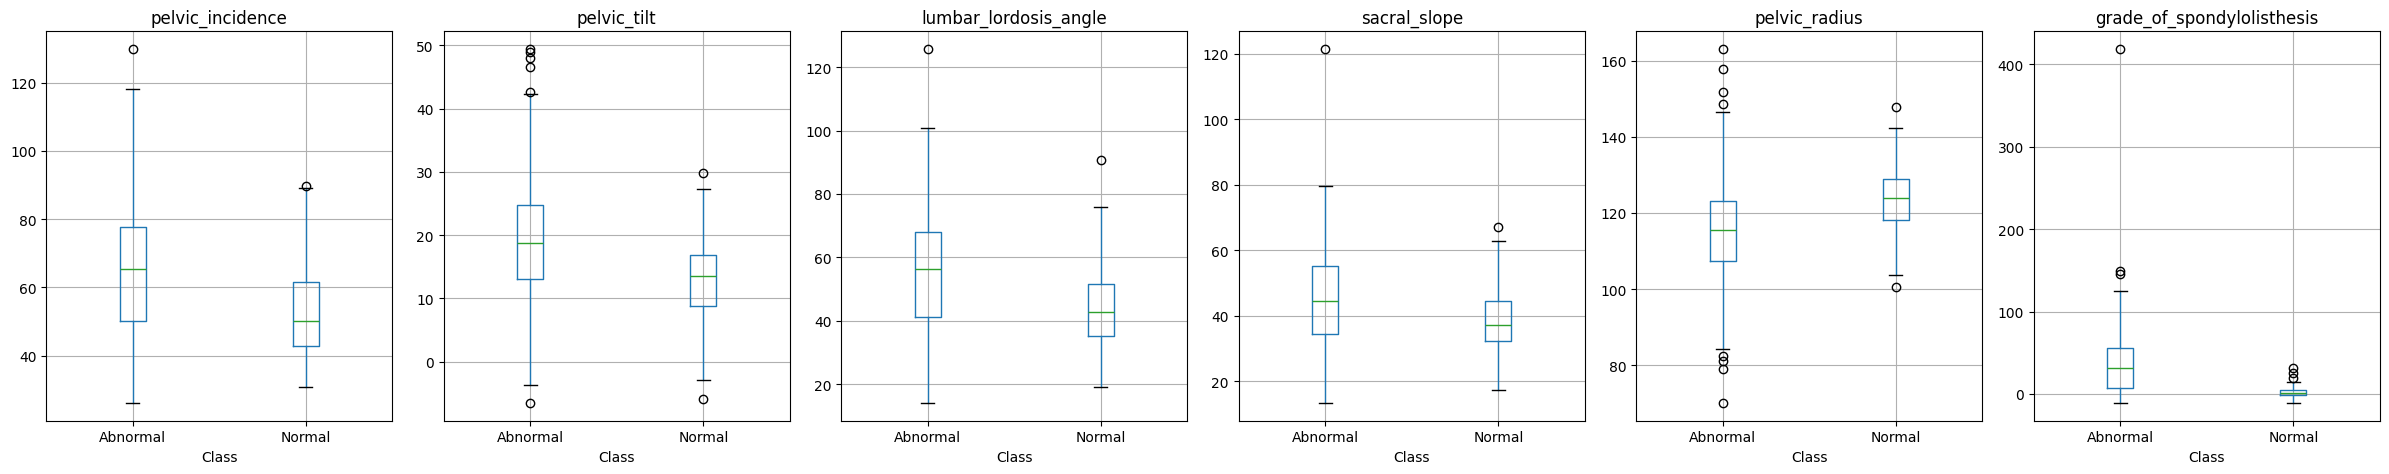

In [17]:
import matplotlib.pyplot as plt

features = df.drop(columns='class_att').columns
n_features = len(features)

fig, axes = plt.subplots(1, n_features, figsize=(4 * n_features, 5))

for ax, col in zip(axes, features):
    df.boxplot(column=col, by='class_att', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Class')

plt.suptitle('')
plt.tight_layout()
plt.show()


#### Интерпретация boxplot’ов по классам

**Pelvic Incidence**

Для признака *pelvic incidence* наблюдается отчётливый сдвиг распределения в сторону больших значений у пациентов с аномалиями позвоночника.
Медиана и верхний квартиль класса Abnormal значительно превышают соответствующие значения класса Normal, при этом в патологической группе присутствуют экстремальные выбросы.
Это указывает на высокую дискриминативную способность данного признака.

**Pelvic Tilt**

Значения *pelvic tilt* в классе Abnormal характеризуются более высокой медианой и большей вариативностью по сравнению с классом Normal.
Наличие значительного количества выбросов в патологической группе может отражать индивидуальные анатомические особенности или тяжёлые клинические случаи.

**Lumbar Lordosis Angle**

Boxplot для *lumbar lordosis angle* демонстрирует выраженное различие между классами: у пациентов с аномалиями наблюдаются как более высокие медианные значения, так и более широкий межквартильный диапазон.
Экстремальные значения в классе Abnormal подчёркивают наличие выраженных деформаций поясничного отдела позвоночника.

**Sacral Slope**

Для *sacral slope* также характерен сдвиг медианы в сторону больших значений в классе Abnormal, однако интерквартильные диапазоны частично перекрываются.
Это указывает на умеренную, но стабильную различительную способность признака.

**Pelvic Radius**

В отличие от большинства других параметров, *pelvic radius* имеет более высокие значения у здоровых пациентов.
Медиана класса Normal превышает медиану класса Abnormal, что подтверждает обратную зависимость данного признака от наличия патологии и делает его полезным дополнительным фактором классификации.

**Grade of Spondylolisthesis**

Признак grade of spondylolisthesis демонстрирует наиболее выраженные различия между классами.
В классе Abnormal наблюдается сильный сдвиг распределения, высокая вариативность и наличие экстремальных выбросов, тогда как значения в классе Normal сконцентрированы вблизи нуля.
Это подтверждает ключевую диагностическую роль данного признака.

#### Итоговый вывод по boxplot’ам

Визуальный анализ распределений подтверждает результаты описательной статистики и показывает, что большинство признаков обладают выраженной различительной способностью.
Особенно информативными являются grade of spondylolisthesis, pelvic incidence и lumbar lordosis angle, тогда как pelvic radius демонстрирует обратную зависимость от целевого класса.

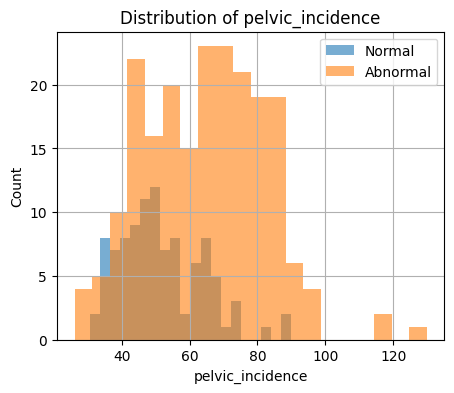

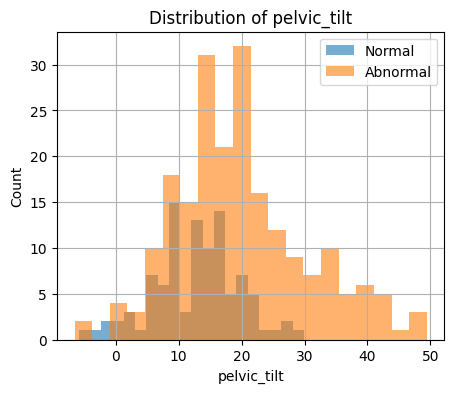

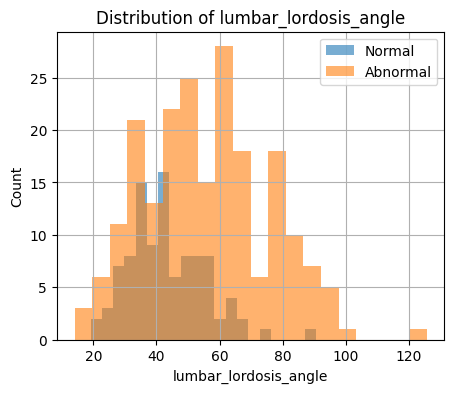

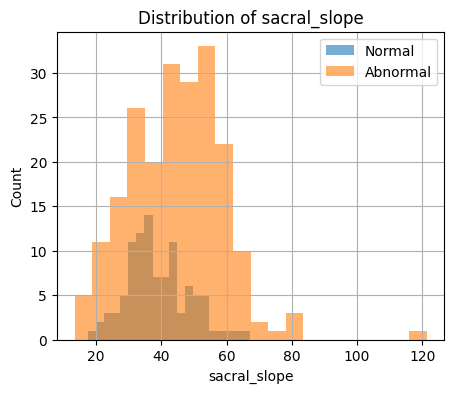

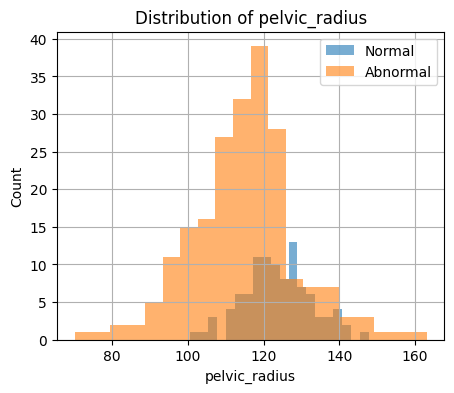

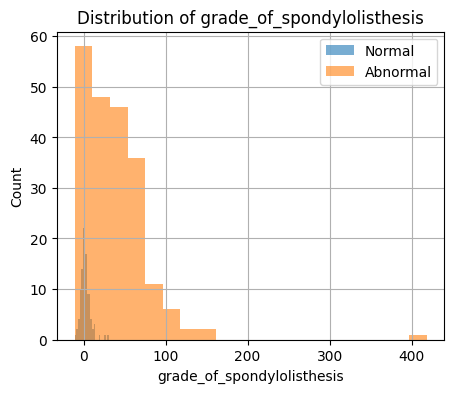

In [18]:
# Распределения по группам

features = df.drop(columns='class_att').columns

for col in features:
    plt.figure(figsize=(5, 4))
    
    df[df['class_att'] == 'Normal'][col].hist(
        bins=20, alpha=0.6, label='Normal'
    )
    df[df['class_att'] == 'Abnormal'][col].hist(
        bins=20, alpha=0.6, label='Abnormal'
    )
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()
    plt.show()


#### Анализ распределений признаков по целевым классам

**Pelvic Incidence**

Распределение *pelvic incidence* у здоровых пациентов имеет относительно компактную форму с концентрацией значений в диапазоне 40–60.
В классе Abnormal распределение смещено вправо и характеризуется более широким диапазоном значений, а также наличием правосторонней асимметрии и экстремальных наблюдений.
Это подтверждает значимый сдвиг признака и его высокую дискриминативную способность.

**Pelvic Tilt**

Для *pelvic tilt* в классе Normal распределение близко к симметричному, с умеренной дисперсией.
В классе Abnormal наблюдается более выраженная правосторонняя асимметрия и увеличение разброса значений, что указывает на неоднородность патологической группы.

**Lumbar Lordosis Angle**

Распределение угла поясничного лордоза у здоровых пациентов относительно узкое и сосредоточено в области меньших значений.
В классе Abnormal распределение заметно расширено и смещено вправо, с наличием экстремальных значений, что отражает выраженные нарушения геометрии позвоночника.

**Sacral Slope**

Для sacral slope наблюдается частичное перекрытие распределений между классами, однако распределение класса Abnormal имеет более высокий центр и больший разброс.
Это указывает на умеренную информативность признака при сохранении определённой диагностической ценности.

**Pelvic Radius**

Распределения pelvic radius в обоих классах имеют близкую форму, однако у здоровых пациентов наблюдается смещение в сторону больших значений.
В классе Abnormal распределение более растянуто и содержит левостороннюю асимметрию, что согласуется с результатами описательной статистики.

**Grade of Spondylolisthesis**

Распределение *grade of spondylolisthesis* демонстрирует наиболее выраженные различия между классами.
У здоровых пациентов значения сосредоточены вблизи нуля, тогда как в классе Abnormal распределение резко асимметрично с длинным правым хвостом и экстремальными выбросами.Это подчёркивает ключевую роль данного признака в задаче классификации. 
>Экстремальные значения параметра *grade_of_spondylolisthesis* были сохранены, поскольку они отражают клинически выраженные деформации, а не ошибки измерения. Для устранения асимметрии, в зависимости от выбора машинного обучения возможно применение преобразования

#### Итоговый вывод по распределениям

>Большинство признаков демонстрируют смещение распределений и различия в форме между классами, что подтверждает их информативность.
>Особенно сильные различия наблюдаются для grade of spondylolisthesis, pelvic incidence и lumbar lordosis angle.
>Наличие асимметричных распределений и выбросов указывает на необходимость использования робастных методов масштабирования и моделей, устойчивых к выбросам.

>Полученные результаты подтверждают целесообразность дальнейшего применения методов машинного обучения для автоматической классификации патологий позвоночника.

## **4.2 Проверка на мультиколлениарность**

Heatmap, scatter по необходимости

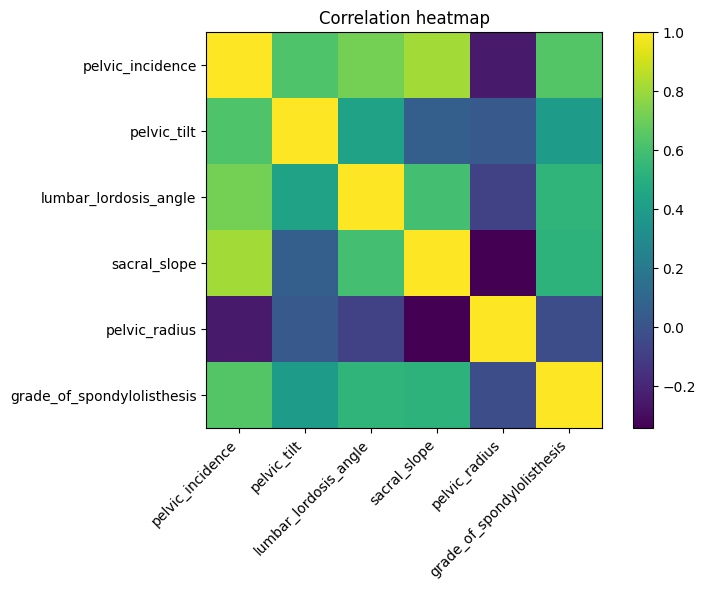

In [19]:
corr = df.drop(columns='class_att').corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation heatmap')
plt.tight_layout()
plt.show()

# |corr| > 0.7 → сильная корреляция
# |corr| > 0.9 → высокая мультиколлинеарность


Корреляционная матрица демонстрирует выраженные взаимосвязи между рядом анатомических параметров позвоночника.
Наиболее сильная положительная корреляция наблюдается между *pelvic incidence* и *sacral slope* (r ≈ 0.85–0.9), а также между *pelvic incidence* и *lumbar lordosis angle*, что соответствует их биомеханической взаимосвязи.
Умеренная положительная корреляция также присутствует между *lumbar lordosis angle* и *sacral slope*.

В то же время признак *pelvic radius* демонстрирует слабую или отрицательную корреляцию с большинством других параметров, что указывает на его относительную независимость.
Признак *grade of spondylolisthesis* показывает умеренную положительную корреляцию с большинством угловых характеристик, подтверждая его клиническую значимость.

Наличие сильных корреляций указывает на потенциальную мультиколлинеарность, что следует учитывать при использовании линейных моделей.

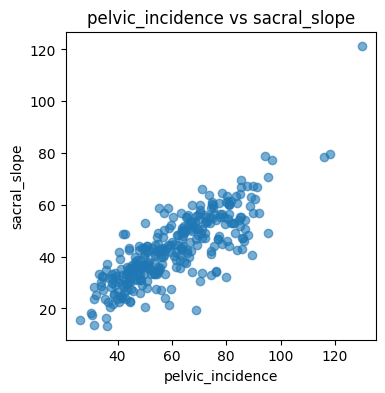

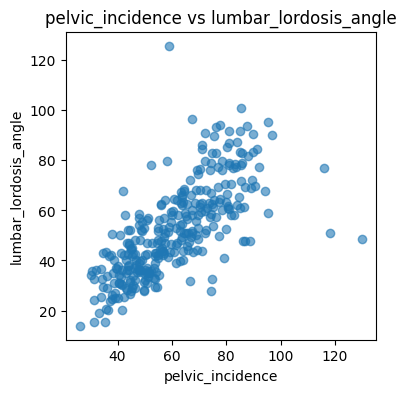

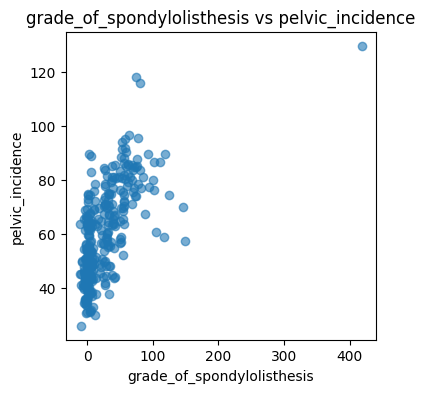

In [20]:
pairs_strong = [
    ('pelvic_incidence', 'sacral_slope'),
    ('pelvic_incidence', 'lumbar_lordosis_angle'),
    ('grade_of_spondylolisthesis', 'pelvic_incidence') # умеренная корреляция
]

for x, y in pairs_strong:
    plt.figure(figsize=(4, 4))
    plt.scatter(df[x], df[y], alpha=0.6)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs {y}')
    plt.show()


Scatterplot-анализ подтвердил результаты корреляционной матрицы и показал, что сильные корреляции между анатомическими параметрами имеют преимущественно линейный характер.
Это подтверждает наличие мультиколлинеарности и обосновывает использование регуляризации или моделей, устойчивых к коррелированным признакам.

Полученные данные указывают на необходимость построения **Variance Inflation Factor (VIF)**


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=['class_att'])

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) 
                   for i in range(X.shape[1])]

print(vif_data)

                      feature        VIF
0            pelvic_incidence        inf
1                 pelvic_tilt        inf
2       lumbar_lordosis_angle  18.942994
3                sacral_slope        inf
4               pelvic_radius  12.282573
5  grade_of_spondylolisthesis   2.361769


c:\Users\user\ANALYSIS\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Анализ факторов инфляции дисперсии (VIF) выявил выраженную мультиколлинеарность между признаками pelvic incidence, pelvic tilt и sacral slope.
Для указанных параметров значения VIF оказались бесконечными, что указывает на их линейную зависимость и подтверждает известную анатомическую взаимосвязь между этими характеристиками.
Признак lumbar lordosis angle также демонстрирует высокую степень мультиколлинеарности (VIF > 10), тогда как grade of spondylolisthesis обладает допустимым уровнем корреляции с другими признаками.

Наиболее значимым признаком модели является степень спондилолистеза, тогда как параметры геометрии таза формируют дополнительный диагностический контекст.

#### **Выбор модели**

>С учётом выявленной структуры корреляций, в дальнейшем анализе будут использованы как линейные модели с регуляризацией, так и деревья решений, не чувствительные к мультиколлинеарности.



## **5. Model**
### 1. RandomForest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split


In [23]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=3,
    class_weight='balanced',
    random_state=42
)

# Признаки и целевая переменная
# X exist
y = df['class_att'].map({'Normal': 0, 'Abnormal': 1})

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf.fit(X_train, y_train)

# Предсказание
y_pred = rf.predict(X_test)

# Оценка качества
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.56      0.61        18
           1       0.83      0.89      0.86        44

    accuracy                           0.79        62
   macro avg       0.75      0.72      0.73        62
weighted avg       0.78      0.79      0.78        62

ROC-AUC: 0.720959595959596


>После настройки гиперпараметров Random Forest модель показала хорошеекачество классификации (ROC-AUC = 0.72) и высокую полноту выявления патологий (recall = 0.89).
Дополнительные преобразования признаков не дали бы значимого прироста, поскольку древовидные модели устойчивы к нелинейностям и масштабам данных.

### 2. LogisticRegression

Применена модель с сохранением всех признаков, масштабированием и L2 регуляризацией для стабилизации коэффициентов

In [24]:
import numpy as np
from sklearn.preprocessing import RobustScaler

# преобразование признака с сильной правосторонней асимметрией
X['grade_of_spondylolisthesis_log'] = np.log1p(
    X['grade_of_spondylolisthesis']
)

c:\Users\user\ANALYSIS\.venv\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:

X = X.drop(columns='grade_of_spondylolisthesis')

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

# логистическая регрессия с масштабированием и L2
pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('logreg', LogisticRegression(
        penalty='l2',
        class_weight='balanced',
        max_iter=1000,
        random_state=42
    ))
])

Для масштабирования признаков использовался *RobustScaler*, так как он устойчив к выбросам и не искажает распределения признаков, что особенно важно для медицинских данных с выраженной асимметрией.

In [26]:
pipe.fit(X_train, y_train)

# Предсказание
y_pred_pipe = pipe.predict(X_test)

# Оценка качества
print(classification_report(y_test, y_pred_pipe))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_pipe))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78        18
           1       0.95      0.84      0.89        44

    accuracy                           0.85        62
   macro avg       0.82      0.86      0.84        62
weighted avg       0.88      0.85      0.86        62

ROC-AUC: 0.8648989898989898


c:\Users\user\ANALYSIS\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


>Логистическая регрессия после корректной предобработки данных продемонстрировала существенно более высокое качество по сравнению с Random Forest.
Значение ROC-AUC составило 0.86 против 0.72, что указывает на лучшую способность модели различать норму и патологию.
Результаты свидетельствуют о преимущественно линейной структуре данных и высокой информативности исходных признаков.

#### **Сравнение моделей**

In [27]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'ROC-AUC': [0.865, 0.721],
    'Recall (Abnormal)': [0.84, 0.89],
    'Precision (Abnormal)': [0.95, 0.83],
    'F1 (Abnormal)': [0.89, 0.86],
    'Accuracy': [0.85, 0.79]
})

results


,Model,ROC-AUC,Recall (Abnormal),Precision (Abnormal),F1 (Abnormal),Accuracy
0,Logistic Regression,0.865,0.84,0.95,0.89,0.85
1,Random Forest,0.721,0.89,0.83,0.86,0.79


>Random Forest продемонстрировал более высокую полноту для класса «аномалия» 0.89 против 0.86, что снижает вероятность пропуска патологий.
Однако модель характеризуется низкой полнотой для класса «норма», что приводит к увеличению числа ложноположительных прогнозов.
Логистическая регрессия обеспечивает более сбалансированное качество и лучшую общую разделимость классов, что делает её предпочтительной для использования в качестве основной модели.

>Основной потенциал дальнейшего улучшения связан с оптимизацией порога классификации и применением ансамблевых бустинговых методов.

#### **Оценка значимости признаков**

In [28]:
# логистическая регрессия
coef = pipe.named_steps['logreg'].coef_[0]
features = X.columns

importance = pd.DataFrame({
    'feature': features,
    'coefficient': coef,
    'abs_coef': np.abs(coef)
}).sort_values('abs_coef', ascending=False)

importance

,feature,coefficient,abs_coef
5,grade_of_spondylolisthesis_log,3.920791,3.920791
4,pelvic_radius,-1.131153,1.131153
1,pelvic_tilt,0.811607,0.811607
3,sacral_slope,-0.763035,0.763035
2,lumbar_lordosis_angle,-0.357038,0.357038
0,pelvic_incidence,-0.231199,0.231199


Интерпретация коэффициентов **логистической регрессии** показала, что наибольший вклад в классификацию аномалий позвоночника вносит степень спондилолистеза, увеличение которой существенно повышает вероятность патологии.
Существенное влияние также оказывают параметры, характеризующие геометрию и баланс таза, такие как pelvic tilt, pelvic radius и sacral slope.
Полученные результаты согласуются с клинической логикой задачи и подтверждают, что биомеханические характеристики таза являются ключевыми факторами при выявлении аномалий позвоночника.

**методологическое замечание**

>Следует отметить, что знаки коэффициентов логистической регрессии отражают условное влияние признаков при фиксированных значениях остальных переменных.
В условиях выраженной мультиколлинеарности между анатомическими параметрами направление влияния отдельных признаков может отличаться от наблюдаемых в одномерном анализе распределений, что не является ошибкой модели, а отражает компенсаторные механизмы и взаимосвязи между признаками.

In [29]:
# RandomForest

rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

rf_importance

,feature,importance
5,grade_of_spondylolisthesis_log,0.399787
4,pelvic_radius,0.156985
1,pelvic_tilt,0.130937
0,pelvic_incidence,0.118643
2,lumbar_lordosis_angle,0.100113
3,sacral_slope,0.093536


Анализ важности признаков в модели **Random Forest** показал, что наибольший вклад в классификацию вносит степень спондилолистеза, на долю которой приходится около 40% общей информативности модели.
Значимыми также являются параметры геометрии и баланса таза, такие как pelvic radius и pelvic tilt.
Совпадение ключевых признаков с результатами логистической регрессии подтверждает устойчивость полученных выводов.

## 6. Выводы

В рамках работы были обучены и сравнены две модели машинного обучения для задачи бинарной классификации аномалий позвоночника: **Logistic Regression** и **Random Forest**.

По результатам тестирования логистическая регрессия продемонстрировала **более высокое качество классификации** по большинству ключевых метрик. Значение **ROC-AUC составило 0.86**, что существенно превышает результат Random Forest (0.72), указывая на лучшую способность модели различать нормальные и патологические состояния.

Логистическая регрессия показала:

- более высокую общую точность (accuracy = 0.85),

- высокую полноту и точность для класса «аномалия»,

- существенно лучшую идентификацию нормальных наблюдений, снижая количество ложных срабатываний.

Несмотря на способность Random Forest выявлять нелинейные зависимости, его качество оказалось ниже, вероятно, вследствие **небольшого объёма выборки** и высокой коррелированности признаков.

Полученные результаты указывают на то, что данные обладают **преимущественно линейной структурой**, а корректная предобработка и масштабирование признаков играют ключевую роль в достижении высокого качества модели.

## 7. Рекомендации
#### 1️. Выбор модели

Рекомендуется использовать **Logistic Regression** в качестве основной модели:

- она демонстрирует лучшее качество,

- обладает высокой интерпретируемостью,

- более устойчива при малом объёме данных,

- предпочтительна для медицинских задач и скрининговых систем.

Random Forest может быть сохранён как **вспомогательная или резервная модель** для сравнения и контроля качества.

#### 2. Практическое применение

- Логистическая регрессия подходит для первичного скрининга пациентов.

- Возможна настройка порога принятия решения для увеличения чувствительности при клинических требованиях.

# 8.  PCA

>Исходные признаки сильно коррелированы между собой, что затрудняет обучение линейной модели. PCA преобразует их в ортогональные компоненты, каждая из которых отражает независимый аспект биомеханики позвоночника.

In [30]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
# from sklearn.linear_model import LogisticRegression

pipe_pca = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('logreg', LogisticRegression(
        class_weight='balanced',
        max_iter=1000,
        random_state=42
    ))
])


In [31]:
pipe_pca.fit(X_train, y_train)
y_pred_pca = pipe_pca.predict(X_test)
y_prob_pca = pipe_pca.predict_proba(X_test)[:, 1]

# Оценка качества
print(classification_report(y_test, y_pred_pca))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        18
           1       0.95      0.86      0.90        44

    accuracy                           0.87        62
   macro avg       0.84      0.88      0.85        62
weighted avg       0.89      0.87      0.87        62

ROC-AUC: 0.8762626262626263


>Улучшение качества после применения PCA указывает на то, что ключевая информация о патологии содержится не в отдельных признаках, а в их совместных латентных комбинациях.

In [ ]:
# Сколько компонент осталось

pipe_pca.named_steps['pca'].n_components_


np.int64(4)

In [ ]:
# Доля объяснённой дисперсии

pipe_pca.named_steps['pca'].explained_variance_ratio_


array([0.50823071, 0.20893164, 0.15316443, 0.09320779])

In [35]:
import pandas as pd

loadings = pd.DataFrame(
    pipe_pca.named_steps['pca'].components_.T,
    columns=[f'PC{i+1}' for i in range(pipe_pca.named_steps['pca'].n_components_)],
    index=X.columns
)

loadings


,PC1,PC2,PC3,PC4
pelvic_incidence,0.428738,-0.060223,0.113649,0.202216
pelvic_tilt,0.378782,0.332612,0.781393,-0.159111
lumbar_lordosis_angle,0.390444,0.046755,0.002729,0.615274
sacral_slope,0.364772,-0.266996,-0.284130,0.360932
pelvic_radius,-0.143496,0.884145,-0.279982,0.267613
grade_of_spondylolisthesis_log,0.605485,0.174804,-0.466242,-0.594426


#### **PC1** — *общая выраженность патологии позвоночника*

Самые большие вклады:
- grade_of_spondylolisthesis_log → 0.61
- pelvic_incidence → 0.43
- lumbar_lordosis_angle → 0.39
- pelvic_tilt → 0.38
- sacral_slope → 0.36

>PC1 отражает согласованное увеличение большинства угловых и биомеханических параметров, характерное для патологических изменений.

#### **PC2** — *геометрия таза (размерная характеристика)*

Доминирует:

- pelvic_radius → 0.88

Остальные признаки дают существенно меньший вклад.

> PC2 отражает анатомические размеры таза, менее связанные с патологией напрямую, но влияющие на общую конфигурацию.

#### **PC3** — *компенсаторные изменения положения таза*

Наибольшие вклады:

- pelvic_tilt → 0.78
- grade_of_spondylolisthesis_log → −0.47
- sacral_slope → −0.28

>PC3 может отражать компенсаторные механизмы — изменение наклона таза при прогрессировании патологии.

#### **PC4** — *локальные изменения кривизны*

Основные вклады:

- lumbar_lordosis_angle → 0.62
- grade_of_spondylolisthesis_log → −0.59
- sacral_slope → 0.36

>PC4 отражает локальные изменения поясничного лордоза, частично независимые от общей тяжести патологии.

Анализ нагрузок главных компонент показал, что первая компонента (PC1) отражает согласованное изменение большинства биомеханических параметров и степени спондилолистеза, что соответствует общей выраженности патологии позвоночника.

Остальные компоненты отражают анатомические особенности таза и компенсаторные механизмы, дополняя основную диагностическую информацию. Использование PCA позволило разделить взаимосвязанные признаки на независимые латентные факторы и повысить качество классификации.

## Вывод

>В ходе работы были рассмотрены модели Random Forest и логистической регрессии, а также логистическая регрессия с применением метода главных компонент (PCA).

>Наилучшее качество классификации было достигнуто моделью логистической регрессии с PCA (ROC-AUC = 0.876, accuracy = 0.87), что свидетельствует о высокой способности модели различать норму и патологию.

>Применение PCA позволило снизить влияние мультиколлинеарности признаков и стабилизировать линейную модель без существенной потери чувствительности к патологическому классу.